Accuracy score: 0.813953488372093

Confusion matrix:
 [[11  5]
 [ 3 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.83      0.89      0.86        27

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43



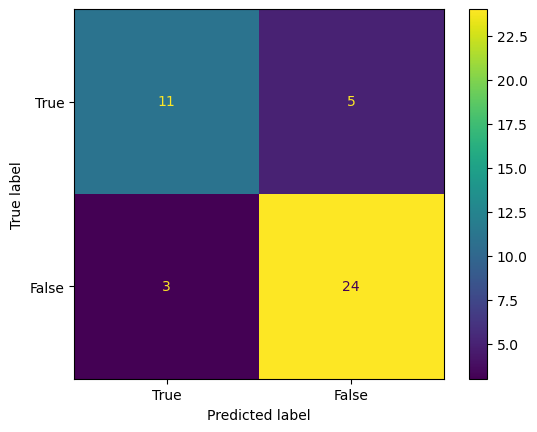

In [1]:
import pandas as pd
data=pd.read_csv("Placement_Data.csv")
data.head()
data1=data.copy()
data1.head()
data1=data1.drop(['sl_no','salary'],axis=1)
data1.isnull().sum()
data1.duplicated().sum()
data1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1["gender"]=le.fit_transform(data1["gender"])
data1["ssc_b"]=le.fit_transform(data1["ssc_b"])
data1["hsc_b"]=le.fit_transform(data1["hsc_b"])
data1["hsc_s"]=le.fit_transform(data1["hsc_s"])
data1["degree_t"]=le.fit_transform(data1["degree_t"])
data1["workex"]=le.fit_transform(data1["workex"])
data1["specialisation"]=le.fit_transform(data1["specialisation"])
data1["status"]=le.fit_transform(data1["status"])
data1
x=data1.iloc[:, : -1]
x
y=data1["status"]
y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("Accuracy score:",accuracy)
print("\nConfusion matrix:\n",confusion)
print("\nClassification Report:\n",cr)
from sklearn import metrics
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=[True,False])
cm_display.plot()